In [1]:
using PyPlot

In [2]:
function minimos_cuadrados(X,Y)
    n = length(X)
    m = (n*sum(X.*Y) - sum(X)*sum(Y))/(n*sum(X.^2) - sum(X)^2)
    b = (sum(Y) - m*sum(X))/n
    return m, b
end

function error_porcent(X,incertidumbre)
    A = X - incertidumbre*X
    B = X + incertidumbre*X
    return A, B
end

function error_normal(X, incertidumbre)
    A = X - incertidumbre
    B = X + incertidumbre
    return A, B
end

function ajuste_recta(X,Y)
    m,b = minimos_cuadrados(X,Y)
    n = length(X)
    
    xs = 0:1:X[n]
    ys = [y = m*x + b for x in xs]
    return m, xs, ys
end

function valor_esperado(X,ν,ℓ)
     n = length(X)
    xs = X[1]:0.01:X[n]
    xs = xs
    ys = [ν*x*ℓ for x in xs]
    
    return xs, ys
end

valor_esperado (generic function with 1 method)

In [3]:
h = 15e-5

0.00015

###  Caracterización del electroimán

#### Corriente(mA) vs Campo(G)

In [4]:
electroiman = [0.1 0.02; 10.6 7.0; 20.0 13.6; 30.2 20.9; 39.5 28.4; 49.8 35.8; 59.3 44.0; 70.5 53.0; 80.3 61.1; 
    90.1 69.0; 101.3 78.5; 110.0 86.1; 121.0 96.2; 130.7 103.6; 140.9 112.8; 149.1 121.4; 159.0 129.5; 170.5 137.5;
    180.1 147.4; 190.3 154.3; 200.5 165.2];

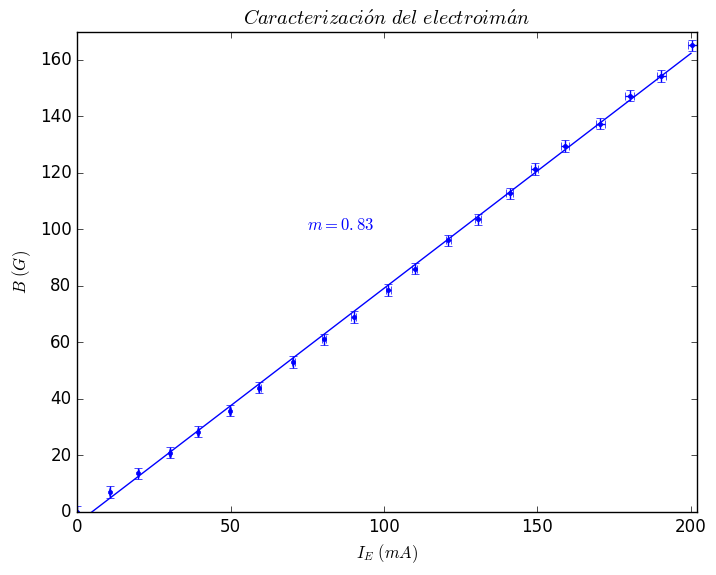

In [131]:
fig = figure()
#plot(electroiman[:,1], electroiman[:,2],".")
errorbar(electroiman[:,1], electroiman[:,2], yerr=2, xerr=electroiman[:,1].*0.008, fmt=".")
m, a_electroiman, b_electroiman = ajuste_recta(electroiman[:,1], electroiman[:,2])
m = round(m,2)
plot(a_electroiman,b_electroiman, "b")

title(L"Caracterizaci\acute{o}n\ del\ electroim\acute{a}n")
xlabel(L"I_E\ (mA)")
ylabel(L"B\ (G)")
ylim(0,170)
xlim(0,202)
text(75,100,latexstring("m =",m), color="b")
savefig("figura_3");

###  Caracterización de la punta Hall (Corriente de control constante)

#### Se fija la corriente de control a 50.1 mA y se varia el campo i.e. la corriente de la fuente

#### campo (G) vs voltaje (mV)

In [6]:
campo_voltaje_50 = [0.0 35.3; 50.6 35.5; 101.6 35.8; 155.6 36.1; 201.5 36.3; 251.8 36.5; 296.7 36.8; 350.0 37.1;
    400.0 37.3; 450.0 37.6; 500.0 37.9; 550.0 38.2; 600.0 38.4; 650.0 38.7; 700.0 39.0; 750.0 39.3; 800.0 39.6;
    850.0 40.0; 900.0 40.3; 950.0 40.6; 1000.0 41.0; 1050.0 41.3];

#### Se fija la corriente de control a 100.4 mA y se varia el campo i.e. la corriente de la fuente

#### campo (G) vs voltaje (mV)

In [7]:
campo_voltaje_100 = [0.0 69.9; 50 70.3; 100 71.2; 150 71.8; 200 72.3; 250 72.7; 300 73.3; 350 73.8; 400 74.3; 450 74.8;
    500 75.4; 550 75.9; 600 76.6; 650 77.1; 700 77.5; 750 78.1; 800 78.4; 850 79.0; 900 79.5; 950 80.1; 1000 80.6;
    1050 81.3];

#### Se fija la corriente de control a 134.9 mA y se varia el campo i.e. la corriente de la fuente

#### campo (G) vs voltaje (mV)

In [8]:
campo_voltaje_150 = [0 94.7; 50 95.6; 100 96.5; 150 97.4; 200 98.1; 250 98.8; 300 99.6; 350 100.1; 400 100.8;
    450 101.7; 500 102.6; 550 103.4; 600 104.2; 650 105.0; 700 105.7; 750 106.6; 800 107.5; 850 108.2; 900 109.0;
    950 109.8; 1000 110.6; 1050 111.4];

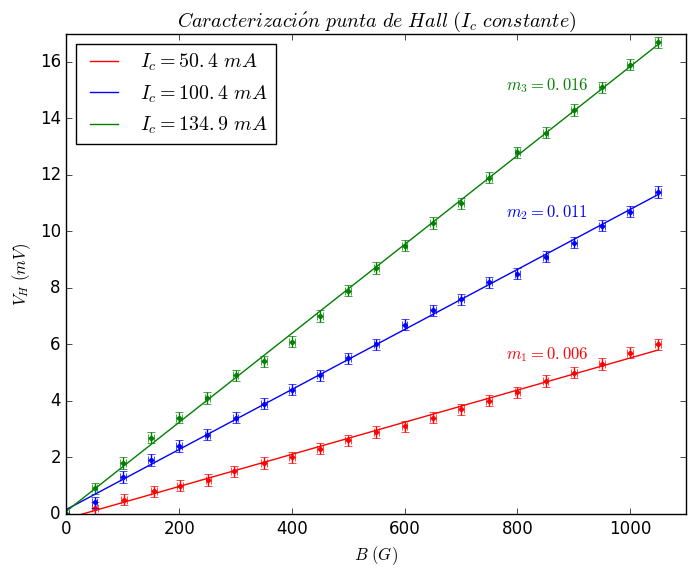

In [130]:
errorbar(campo_voltaje_50[:,1], campo_voltaje_50[:,2].-campo_voltaje_50[1,2],yerr=0.2,xerr=5,c="r",fmt=".",ecolor="r")
errorbar(campo_voltaje_100[:,1], campo_voltaje_100[:,2].-campo_voltaje_100[1,2],yerr=0.2,xerr=5,c="b",fmt=".",ecolor="b")
errorbar(campo_voltaje_150[:,1], campo_voltaje_150[:,2].-campo_voltaje_150[1,2],yerr=0.2,xerr=5,c="g",fmt=".",ecolor="g")

m₁, a_50, b_50 = ajuste_recta(campo_voltaje_50[:,1], campo_voltaje_50[:,2].-campo_voltaje_50[1,2])
m₂, a_100, b_100 = ajuste_recta(campo_voltaje_100[:,1], campo_voltaje_100[:,2].-campo_voltaje_100[1,2])
m₃, a_150, b_150 = ajuste_recta(campo_voltaje_150[:,1], campo_voltaje_150[:,2].-campo_voltaje_150[1,2])

m₁ = round(m₁,3)
m₂ = round(m₂,3)
m₃ = round(m₃,3)

plot(a_50,b_50, "r", label=L"$I_c = 50.4\ mA$")
plot(a_100,b_100, "b", label=L"$I_c = 100.4\ mA$")
plot(a_150,b_150, "g", label=L"$I_c = 134.9\ mA$")


title(L"Caracterizaci\acute{o}n\ punta\ de\ Hall\ (I_c\ constante)")
xlabel(L"$B\ (G)$")
ylabel(L"$V_H\ (mV)$")
ylim(0,17)
xlim(0,1100)
legend(loc="upper left")
text(780,15,latexstring("m_3 =",m₃), color="green")
text(780,10.5,latexstring("m_2 =",m₂), color="blue")
text(780,5.5,latexstring("m_1 =",m₁), color="red")
savefig("figura_4");

In [360]:
RH₁ = m₁*h/0.0504/1000
RH₂ = m₂*h/0.1004/1000
RH₃ = m₃*h/0.1349/1000

(RH₁ + RH₂ + RH₃)/3

1.73607873564164e-8

###  Caracterización de la punta Hall (Campo constante)

#### Se fija el campo magnético a 500 G y se varia la corriente de control (I$_c$)  

#### Corriente de control (mA) vs Voltaje (mV)

In [10]:
corriente_voltaje_500 = [8.8 6.7; 20.2 15.2; 30.4 22.9; 40.3 30.4; 50.1 37.7; 60.5 45.5; 70.9 53.4; 80.7 60.7; 90.1 68;
    99.1 74.7; 109.6 82.7; 120.4 90.8; 129.8 97.9; 137.7 103.9];

#### Se fija el campo magnético a 1000 G y se varia la corriente de control (I$_c$)  

#### Corriente de control (mA) vs Voltaje (mV)

In [11]:
corriente_voltaje_1000 = [8.9 7.2; 20.1 16.2; 30.5 24.6; 40.1 32.6; 50.2 40.5; 60.6 48.9; 69.9 56.5; 79.6 64.3;
    91.8 74.1; 101.1 81.8; 110.1 89.1; 120.8 97.7; 129.9 105.0; 138.1 111.6];

#### Se fija el campo magnético a 1500 G y se varia la corriente de control (I$_c$)  

#### Corriente de control (mA) vs Voltaje (mV)

In [12]:
corriente_voltaje_750 = [8.9 6.9; 20 15.6; 30 23.3; 40.2 31.3; 50.1 39.2; 60.7 47.3; 70.1 54.7; 80.5 62.9; 90.3 70.5; 
    99.4 77.6; 110.4 86.2; 121.4 94.9; 131 102.3; 138.8 108.4];

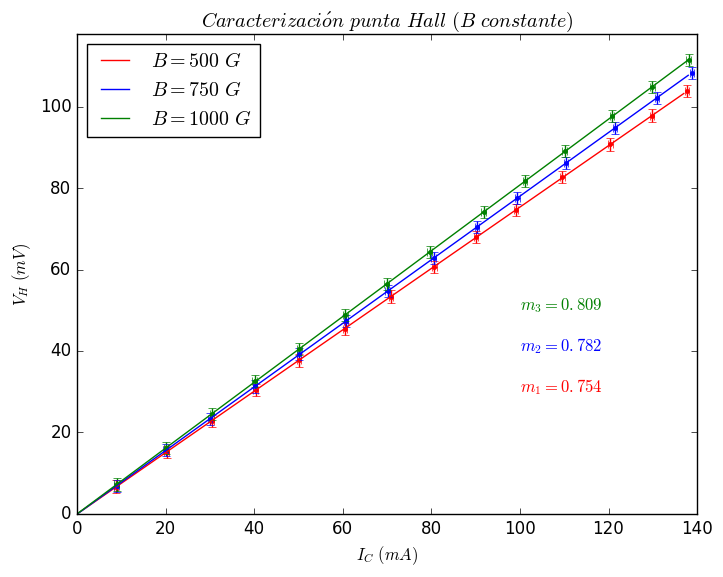

In [128]:
errorbar(corriente_voltaje_500[:,1], corriente_voltaje_500[:,2],yerr=1.5,xerr=0.5,c="r",fmt=".",ecolor="r")
errorbar(corriente_voltaje_750[:,1], corriente_voltaje_750[:,2],yerr=1.5,xerr=0.5,c="b",fmt=".",ecolor="b")
errorbar(corriente_voltaje_1000[:,1], corriente_voltaje_1000[:,2],yerr=1.5,xerr=0.5,c="g",fmt=".",ecolor="g")

m₄, a_500, b_500 = ajuste_recta(corriente_voltaje_500[:,1], corriente_voltaje_500[:,2])
m₅, a_750, b_750 = ajuste_recta(corriente_voltaje_750[:,1], corriente_voltaje_750[:,2])
m₆, a_1000, b_1000 = ajuste_recta(corriente_voltaje_1000[:,1], corriente_voltaje_1000[:,2])
 
m₄ = round(m₄,3)
m₅ = round(m₅,3)
m₆ = round(m₆,3)

plot(a_500, b_500, "r", label=L"B = 500\ G")
plot(a_750, b_750, "b", label=L"B = 750\ G")
plot(a_1000, b_1000, "g", label=L"B = 1000\ G")

title(L"Caracterizaci\acute{o}n\ punta\ Hall\ (B\ constante)")
xlabel(L"$I_C\ (mA)$")
ylabel(L"$V_H\ (mV)$")
ylim(0,118)
legend(loc="upper left")
text(100, 30, latexstring("m_1 =",m₄), color="r")
text(100, 40, latexstring("m_2 =",m₅), color="b")
text(100, 50, latexstring("m_3 =",m₆), color="g")
savefig("figura_5");

In [365]:
RH₄ = h*m₄/500
RH₅ = h*m₅/750
RH₆ = h*m₆/1000

(RH₄ + RH₅ + RH₆)/3

1.6798333333333332e-7

In [366]:
(1.67+1.73)/2 

1.7

### Variación del Voltaje respecto al ángulo 

#### Se fija el campor magnético a 500 G y la corriente de control a 100.5 mA, y se gira la punta Hall 10ª por medición

In [34]:
angulo_voltaje_500 = [71.3, 69.6, 68.5, 67.5, 66.8, 66.3, 66.1, 66.4, 66.8, 67.7, 69.0, 70.1, 71.2, 72.4, 73.8, 74.5, 
    74.9, 75.6, 76.5, 76.6, 75.4, 74.6, 73.3, 72.3, 71.3];

#### Se fija el campor magnético a 750 G y la corriente de control a 100.4 mA, y se gira la punta Hall 10ª por medición

In [35]:
angulo_voltaje_750 = [72.0, 69.7, 69.4, 67.9, 67.7, 66.5, 66.4, 66.7, 67.4, 68.0, 69.8, 70.3, 71.4, 72.9, 74.2, 74.9,
    75.3, 75.6, 76.7 , 77.0, 75.6, 74.9, 73., 72.5, 72.0];

#### Se fija el campor magnético a 1000 G y la corriente de control a 100.7 mA, y se gira la punta Hall 10ª por medición

In [36]:
angulo_voltaje_1000 = [ 71.3, 70.1, 67.5, 66.8, 67.3, 65.6, 66.6, 65.7, 67.1, 67.7, 68.3, 70.4, 71.2, 71.5, 73.9,
    73.9, 74.1, 75.1, 77.0, 77.1, 74.7, 74.8, 73.6, 71., 70.7];

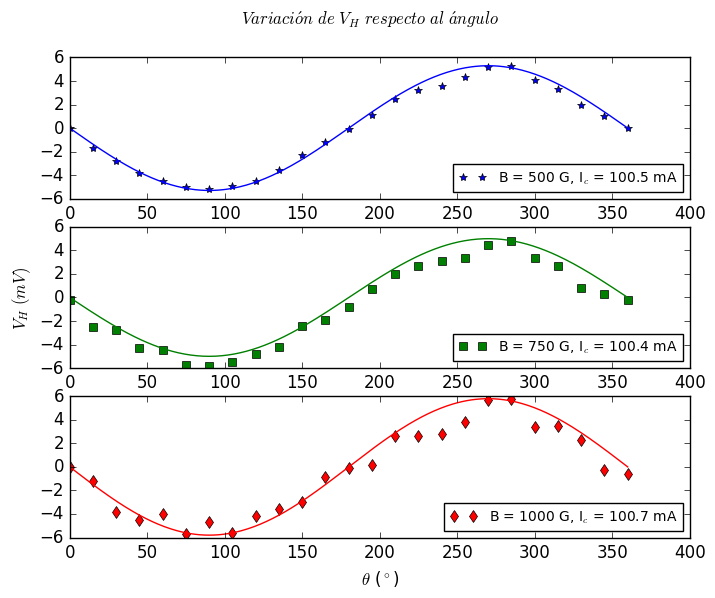

In [352]:
subplot(311)
plot(0:15:360, angulo_voltaje_500.-71.3, "*", label=L"B = 500 G, I$_c$ = 100.5 mA")
#plot(0:15:360, angulo_voltaje_500.-71.3, "b")
plot(1:360,[-5.3*sin(x*2π/360) for x in 1:360], "b")
legend(loc="lower right", fontsize="small")
subplot(312)
plot(0:15:360, angulo_voltaje_750.-72.2, "gs", label=L"B = 750 G, I$_c$ = 100.4 mA")
#plot(0:15:360, angulo_voltaje_750.-72.2, "g")
plot(1:360,[-5*sin(x*2π/360) for x in 1:360], "g")
ylabel(L"$V_H\ (mV)$")
legend(loc="lower right", fontsize="small")
subplot(313)
plot(0:15:360, angulo_voltaje_1000.-71.3, "rd", label=L"B = 1000 G, I$_c$ = 100.7 mA")
#plot(0:15:360, angulo_voltaje_1000.-71.3, "r")
plot(1:360,[-5.8*sin(x*2π/360) for x in 1:360], "r")
suptitle(L"Variaci\acute{o}n\ de\ V_H\ respecto\ al\ \acute{a}ngulo")
xlabel(L"$\theta$ ($^\circ$)")
legend(loc="lower right", fontsize="small")
savefig("figura_6");

### Se fija la corriente de control a 100.3 mA y la corriente que alimenta el electroimán a 253 mA

#### Voltaje (mV)

El electroimán es un círculo de 11 cm de diámetro y la separación entre las bobinas es de 4 cm

In [67]:
mapeo_electroiman_centro = [1 1 3 4 5 6 6 6 5 4 3;
2 3 5 6 7 7 7 7 6 6 2;
3 4 6 7 7 8 7 7 7 6 6;
4 6 7 8 7 8 8 8 8 7 6;
5 6 7 8 8 8 8 8 8 7 7;
5 6 7 8 8 8 8 8 8 8 7;
5 7 8 8 8 8 8 8 8 8 6;
5 7 7 8 8 8 8 8 8 7 6;
5 7 7 7 8 7 7 7 6 4 4;
3 4 6 7 7 7 7 6 6 4 2;
2 3 5 6 6 6 6 6 6 5 2];

In [85]:
for i in 1:11
    for j in 1:11
        mapeo_electroiman_centro[i,j] = mapeo_electroiman_centro[i,j]*10 + 110
    end
end
mapeo_electroiman_centro

11x11 Array{Int64,2}:
 120  120  140  150  160  170  170  170  160  150  140
 130  140  160  170  180  180  180  180  170  170  150
 140  150  170  180  180  190  180  180  180  170  170
 150  170  180  190  180  190  190  190  190  180  170
 160  170  180  190  190  190  190  190  190  180  180
 160  170  180  190  190  190  190  190  190  190  180
 160  180  190  190  190  190  190  190  190  190  170
 160  180  180  190  190  190  190  190  190  180  170
 160  180  180  180  190  180  180  180  170  150  150
 140  150  170  180  180  180  180  170  170  150  130
 140  140  160  170  170  170  170  170  170  160  150

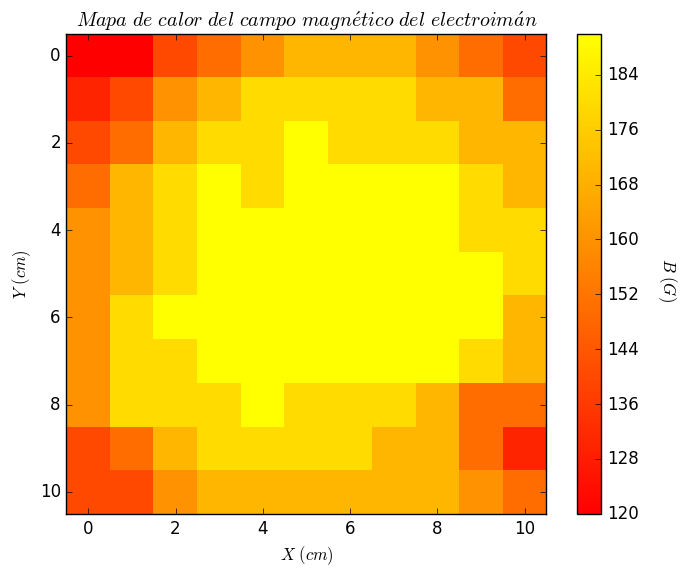

In [224]:
imshow(mapeo_electroiman_centro, interpolation="nearest", cmap="autumn")
colorbar()
ylabel(L"Y\ (cm)")
xlabel(L"X\ (cm)")
text(13,5,L"B\ (G)", rotation="270")
title(L"Mapa\ de\ calor\ del\ campo\ magn\acute{e}tico\ del\ electroim\acute{a}n")
savefig("figura_7")

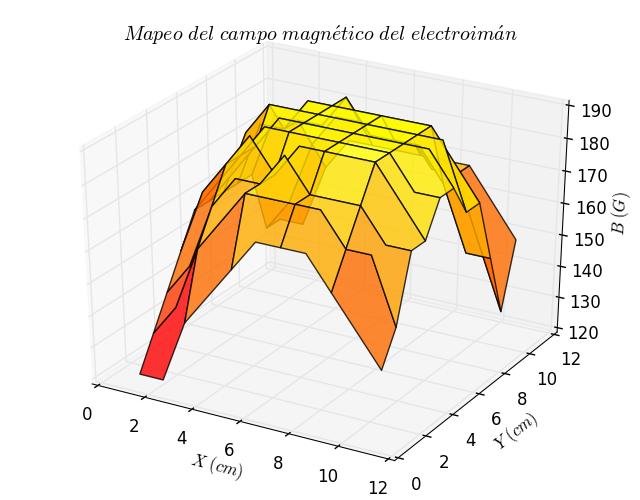

In [330]:
plot_surface(1:11,1:11,mapeo_electroiman_centro, rstride=1, cstride=2, alpha=0.8, cmap="autumn")
xlabel(L"X\ (cm)")
ylabel(L"Y\ (cm)")
zlabel(L"B\ (G)")
title(L"Mapeo\ del\ campo\ magn\acute{e}tico\ del\ electroim\acute{a}n")
savefig("figura_8")

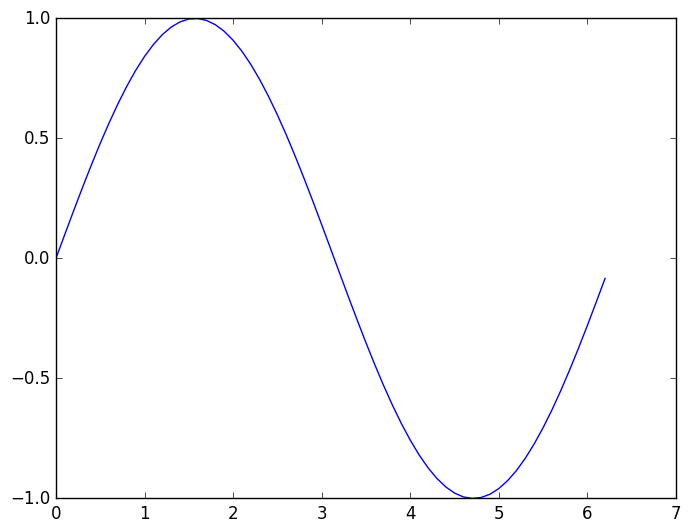

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f32336ef090>

In [343]:
plot(0:0.1:2π, [sin(x) for x in 0:0.1:2π])

In [298]:
mapeo_iman_1 = [7 7 7 6 5 5;
7 7 8 7 7 5;
8 8 8 8 8 8;
8 8 8 8 8 7;
7 7 8 8 8 8;
7 8 8 8 8 8;
7 8 8 8 8 8;
6 8 8 7 8 8;
7 7 8 8 7 7]

for i in 1:9
    for j in 1:6
        mapeo_iman_1[i,j] = mapeo_iman_1[i,j].*75
    end
end

9x6 Array{Int64,2}:
 525  525  525  450  375  375
 525  525  600  525  525  375
 600  600  600  600  600  600
 600  600  600  600  600  525
 525  525  600  600  600  600
 525  600  600  600  600  600
 525  600  600  600  600  600
 450  600  600  525  600  600
 525  525  600  600  525  525

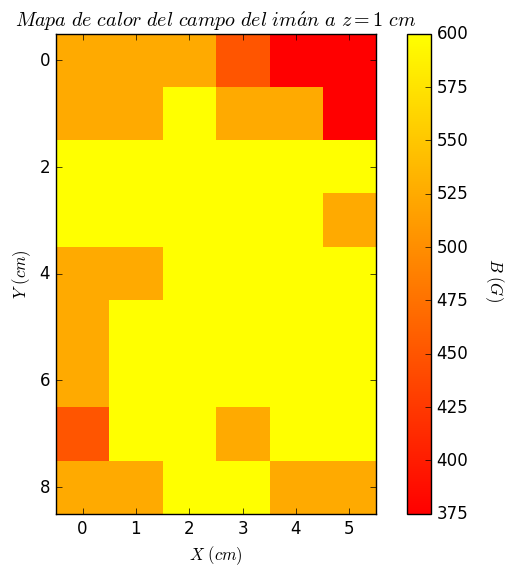

In [339]:
imshow(mapeo_iman_1, interpolation="nearest", cmap="autumn")
colorbar()
ylabel(L"Y\ (cm)")
xlabel(L"X\ (cm)")
text(7.5,4,L"B\ (G)", rotation="270")
title(L"Mapa\ de\ calor\ del\ campo\ del\ im\acute{a}n\ a\ z=1\ cm")
savefig("figura_9")

In [312]:
mapeo_iman_2 = [7 7 7 6 6 5;
6 7 8 7 6 6;
7 8 8 8 8 8;
8 8 8 8 8 7;
7 7 7 8 8 7;
7 8 8 8 8 6;
7 8 8 8 8 8;
6 7 8 7 8 7;
7 7 8 8 7 7]

for i in 1:9
    for j in 1:6
        mapeo_iman_2[i,j] = mapeo_iman_2[i,j].*50
    end
end

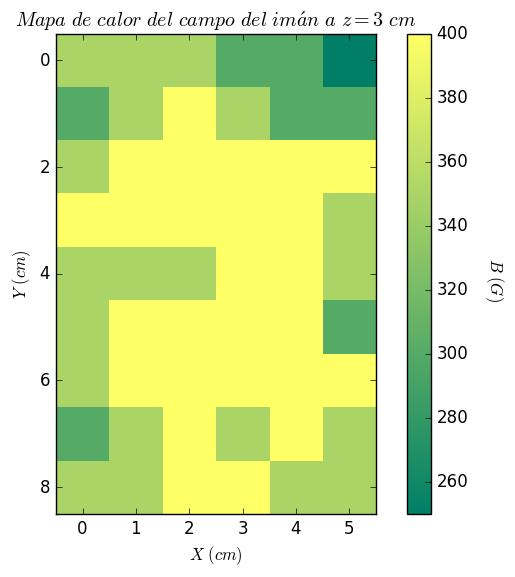

In [324]:
imshow(mapeo_iman_2, interpolation="nearest", cmap="summer")
colorbar()
ylabel(L"Y\ (cm)")
xlabel(L"X\ (cm)")
text(7.5,4,L"B\ (G)", rotation="270")
title(L"Mapa\ de\ calor\ del\ campo\ del\ im\acute{a}n\ a\ z=3\ cm")
savefig("figura_10")

In [325]:
mapeo_iman_3 = [7 7 7 5 5 5;
7 6 8 6 5 5;
7 7 8 8 8 7;
6 8 8 8 8 7;
7 7 8 8 8 7;
7 8 7 8 8 6;
6 8 7 8 8 8;
6 7 8 7 8 7;
6 5 7 6 7 7]

for i in 1:9
    for j in 1:6
        mapeo_iman_3[i,j] = mapeo_iman_3[i,j].*37
    end
end

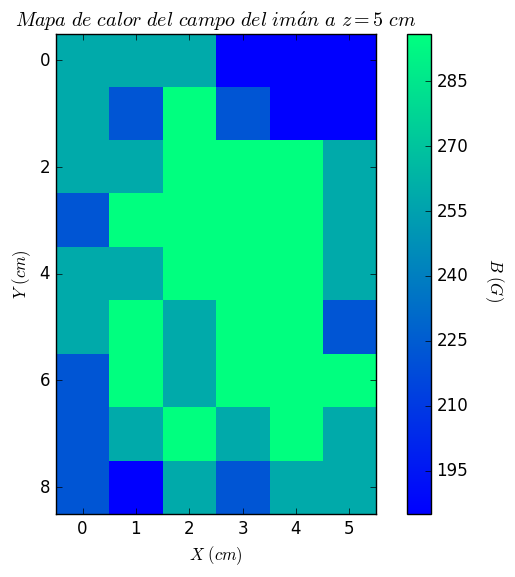

In [326]:
imshow(mapeo_iman_3, interpolation="nearest", cmap="winter")
colorbar()
ylabel(L"Y\ (cm)")
xlabel(L"X\ (cm)")
text(7.5,4,L"B\ (G)", rotation="270")
title(L"Mapa\ de\ calor\ del\ campo\ del\ im\acute{a}n\ a\ z=5\ cm")
savefig("figura_11")

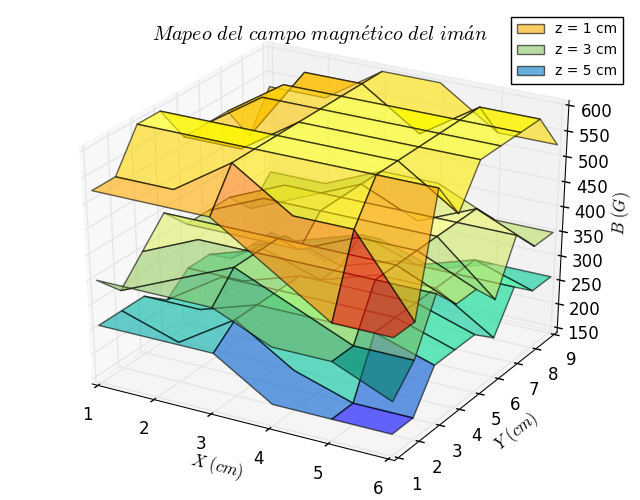

In [371]:
plot_surface(1:6,1:9,mapeo_iman_1, rstride=1, cstride=2, alpha=0.6, cmap="autumn", label="z\ =\ 1 cm")
plot_surface(1:6,1:9,mapeo_iman_2, rstride=1, cstride=2, alpha=0.6, cmap="summer", label="z\ =\ 3\ cm")
plot_surface(1:6,1:9,mapeo_iman_3, rstride=1, cstride=2, alpha=0.6, cmap="winter", label="z\ =\ 5\ cm")
xlabel(L"X\ (cm)")
ylabel(L"Y\ (cm)")
zlabel(L"B\ (G)")
title(L"Mapeo\ del\ campo\ magn\acute{e}tico\ del\ im\acute{a}n")
legend(fontsize="small")
savefig("figura_12")

In [18]:
mapeo_electroiman_1 = [ 73.2  69.8  71.6  73.2  69.4  70.7  69.3;
                        72.1  69.4  72.1  70.9  72.9  71.6  70.9;
                        71.8  70.8  73.0  69.3  71.9  72.3  72.4;
                        69.5  72.7  71.9  71.9  72.0  71.3  72.7;
                        70.7  71.3  71.4  71.4  72.9  71.6  70.2;
                        71.4  70.5  70.1  72.3  72.5  71.8  72.2;
                        71.9  72.4  70.0  70.2  70.6  72.0  72.9];

In [19]:
mapeo_electroiman_2 = [ 70.2  72.3  73.1  74.1  71.3  70.6  69.8;
                        74.2  73.3  71.9  70.5  72.6  74.0  74.0;
                        73.8  72.0  69.2  73.3  69.3  72.7  71.0;
                        73.3  72.3  70.2  73.6  73.9  70.2  70.4;
                        73.8  71.9  73.7  69.0  73.6  70.6  71.6;
                        72.9  73.3  74.1  70.7  72.5  69.5  69.2;
                        70.0  71.8  74.0  71.8  72.5  71.8  71.9];

### Mapeo de la barra de imán permanente  

Se fija la corriente de control a 98.1

In [21]:
mapeo_iman_hall =[63.5 63.7 63.3 63.3 63.1 62.3 63.7 64.1 63.8 63.7 63.7 62.5;
63.1 63.5 64.4 64.6 64.7 64.8 64.7 64.9 64.0 64.7 64.7 64.2;
64.1 64.2 64.5 64.9 65.1 65.2 65.2 65.1 65.2 65.1 65.1 64.6;
65.1 65.2 65.6 65.9 66.0 66.1 65.6 64.0 64.9 65.7 65.5 65.7;
65.5 65.5 66.1 67.1 67.4 67.6 67.5 67.5 67.4 67.3 67.0 66.3;
66.8 66.7 67.1 67.3 67.5 67.5 67.6 67.6 67.5 67.4 67.1 66.4;
66.6 65.9 66.2 66.3 66.5 66.6 66.7 66.7 66.7 66.5 66.3 65.3;
68.8 66.4 66.6 67.1 67.2 67.0 67.1 67.1 67.3 66.9 66.7 66.8];

Se hacen exacatamente las mismas mediciones en los mismos lugares, pero ahora con el Gaussmetro (kG)

In [22]:
mapeo_iman_gauss = [0.416 0.416 0.540 0.537 0.557 0.555 0.570 0.565;
                    0.546 0.568 0.528 0.490 0.487 0.485 0.473 0.480;
0.546 0.568 0.528 0.490 0.487 0.485 0.473 0.480];